### Import Relevan Packages

In [1]:
library(tidyverse)
library(gapminder)
library(dplyr)
library(ggplot2)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks 

##### Using "filter()" for gapminder

In [2]:
head(gapminder[1:5,])

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811


In [ ]:
gapminder %>%
    filter(year == 2007) %>% # it selects all obs which variable year is 2007
        head() 

##### Using "arrange()" for gapminder

In [ ]:
gapminder %>%
    arrange(gdpPercap) %>% head() # it selects all obs, but sorts it in ascending way based on gdpPercap
   # arrange(desc(gdpPercap)) # it selects all obs, but sorts it in descending way based on gdpPercap

##### Using "arrange()" and "filter()" for gapminder

In [48]:
gapminder %>%
    filter(year == 2007) %>% 
        arrange(desc(pop)) %>%
            head()

country,continent,year,lifeExp,pop,gdpPercap
China,Asia,2007,72.961,1318683096,4959.115
India,Asia,2007,64.698,1110396331,2452.210
United States,Americas,2007,78.242,301139947,42951.653
Indonesia,Asia,2007,70.650,223547000,3540.652
Brazil,Americas,2007,72.390,190010647,9065.801
Pakistan,Asia,2007,65.483,169270617,2605.948


##### Replacing a new variable

In [53]:
gapminder %>% 
    mutate(pop = pop/1000000) %>% head() # "mutate()" replaces the original "pop" for pop/1000000

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8.425333,779.4453
Afghanistan,Asia,1957,30.332,9.240934,820.8530
Afghanistan,Asia,1962,31.997,10.267083,853.1007
Afghanistan,Asia,1967,34.020,11.537966,836.1971
Afghanistan,Asia,1972,36.088,13.079460,739.9811
Afghanistan,Asia,1977,38.438,14.880372,786.1134


##### Creating a new variable

In [55]:
gapminder %>%
    mutate(gdp = gdpPercap*pop) %>% head() # It creates a new variabe called "gdp"

country,continent,year,lifeExp,pop,gdpPercap,gdp
Afghanistan,Asia,1952,28.801,8425333,779.4453,6567086330
Afghanistan,Asia,1957,30.332,9240934,820.8530,7585448670
Afghanistan,Asia,1962,31.997,10267083,853.1007,8758855797
Afghanistan,Asia,1967,34.020,11537966,836.1971,9648014150
Afghanistan,Asia,1972,36.088,13079460,739.9811,9678553274
Afghanistan,Asia,1977,38.438,14880372,786.1134,11697659231


##### Creating a new DataFrame

In [58]:
gapminder_2007 <- gapminder %>% filter(year == 2007) # it creates a new DF called "gapminder_2007" by the year 2007
head(gapminder_2007)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


##### Creating a plot with "ggplot2"

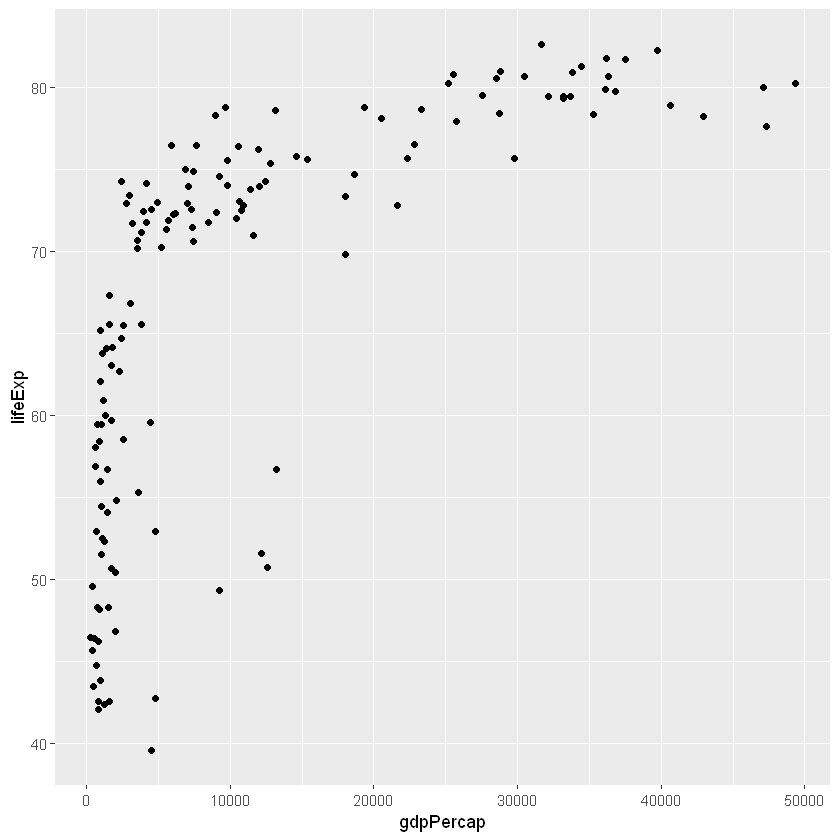

In [60]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp)) + # parameters of the plot
    geom_point() # type of plot

##### Logarithmic scale plot, add color to points and size to points

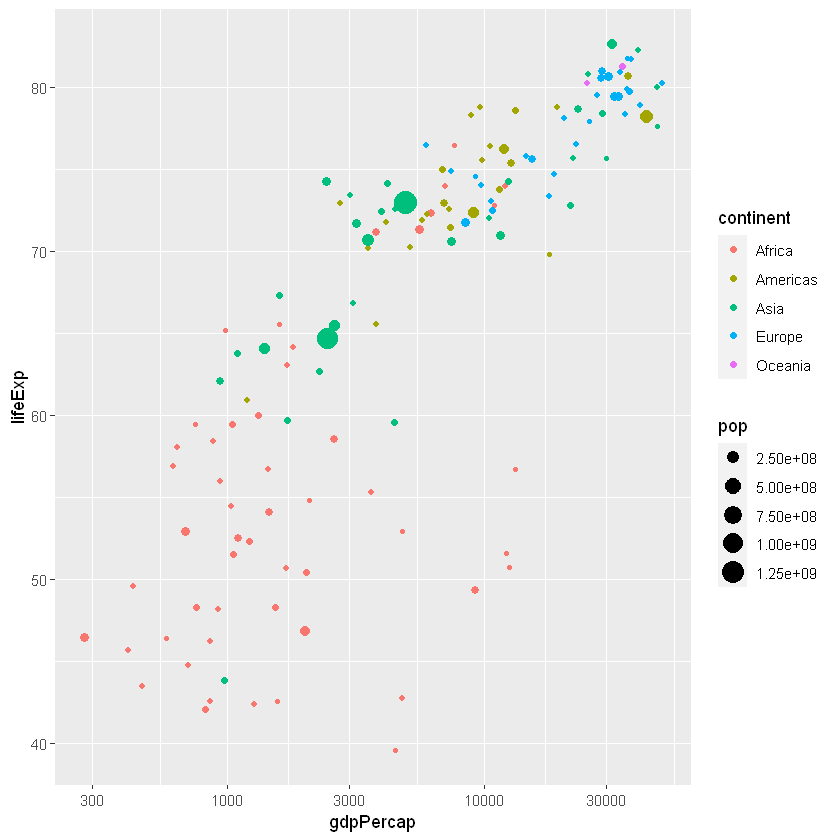

In [65]:
ggplot(gapminder_2007, 
       aes(x = gdpPercap, y = lifeExp,    # parameters of the plot
        color = continent, size = pop)) + # adding color for each continent and each country pop size
                           geom_point() + # type of plot 
                        scale_x_log10() # difining the axis into an scale form
            

##### Faceting - Multiple plots

###### Plot of lifeExp against time for countries by continent

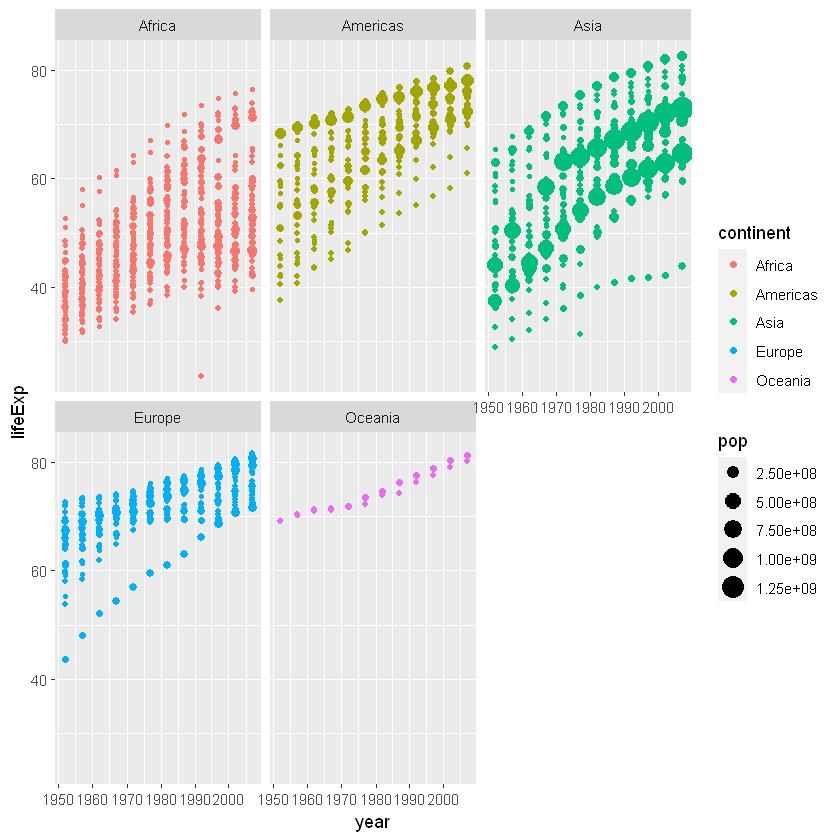

In [72]:
ggplot(gapminder, aes(x = year, y = lifeExp, color = continent, size = pop)) + geom_point() + scale_x_log10() +
        facet_wrap(~continent) # desagregate plots by each continent

###### Plot of lifeExp against gdpPercap for countries by continent in 2007

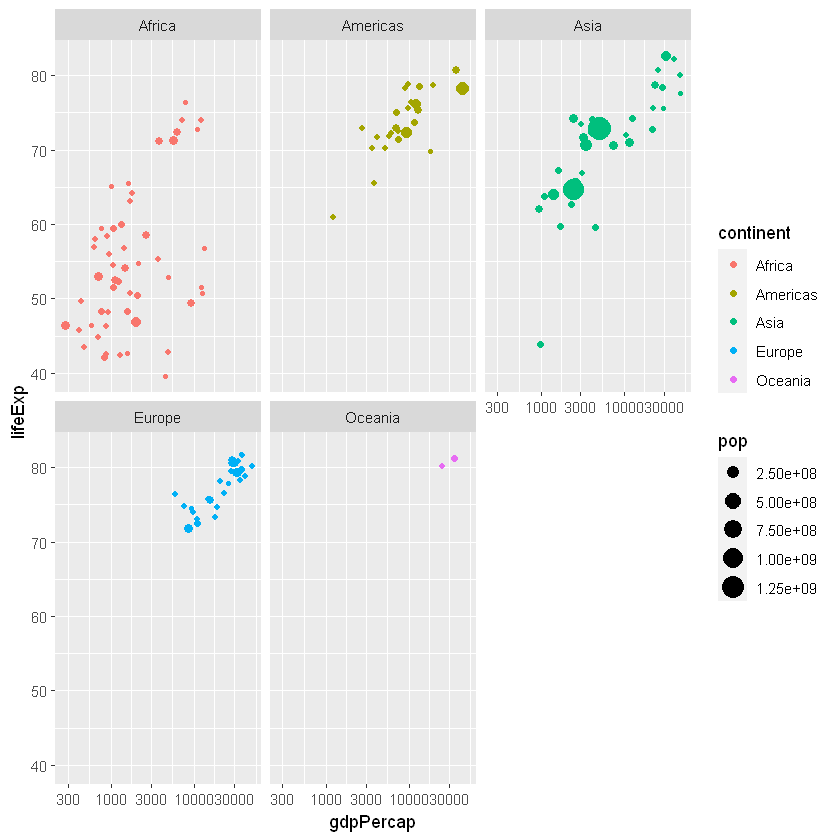

In [73]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) + geom_point() + scale_x_log10() +
        facet_wrap(~continent) # desagregate plots by each continent

###### Plot of gdpPercap against time for countries in America

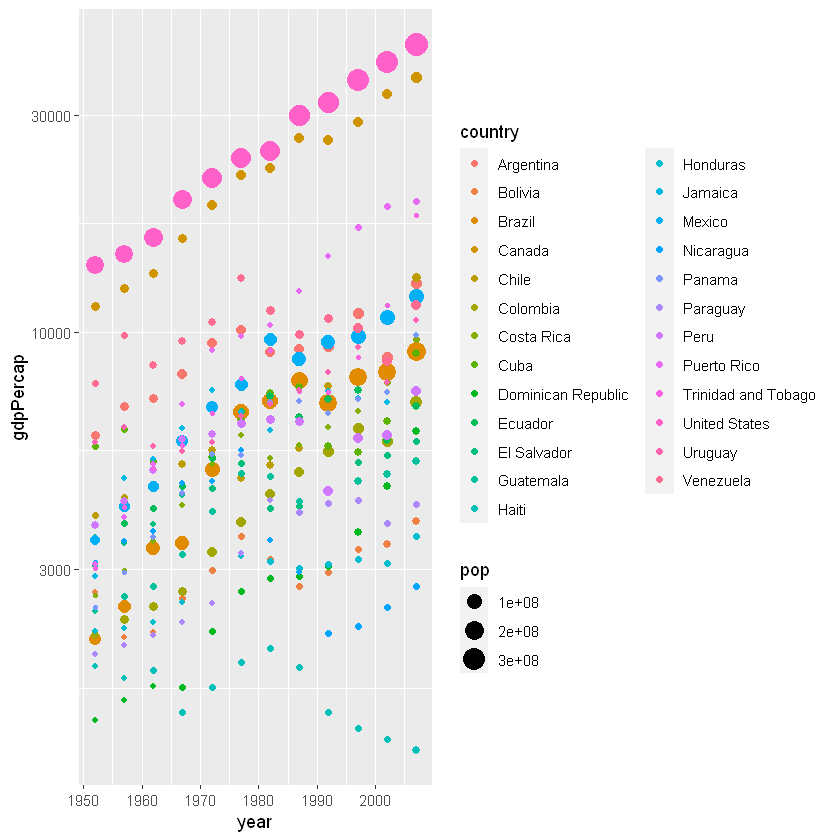

In [75]:
gapminder_americas <- gapminder %>% filter(continent == "Americas")
ggplot(gapminder_americas, aes(x = year, y = gdpPercap, color = country, size = pop)) + geom_point() + scale_y_log10() 
     # + facet_wrap(~continent) # desagregate plots by each continent

###### Plot of gdpPercap against time for Colombia and United States

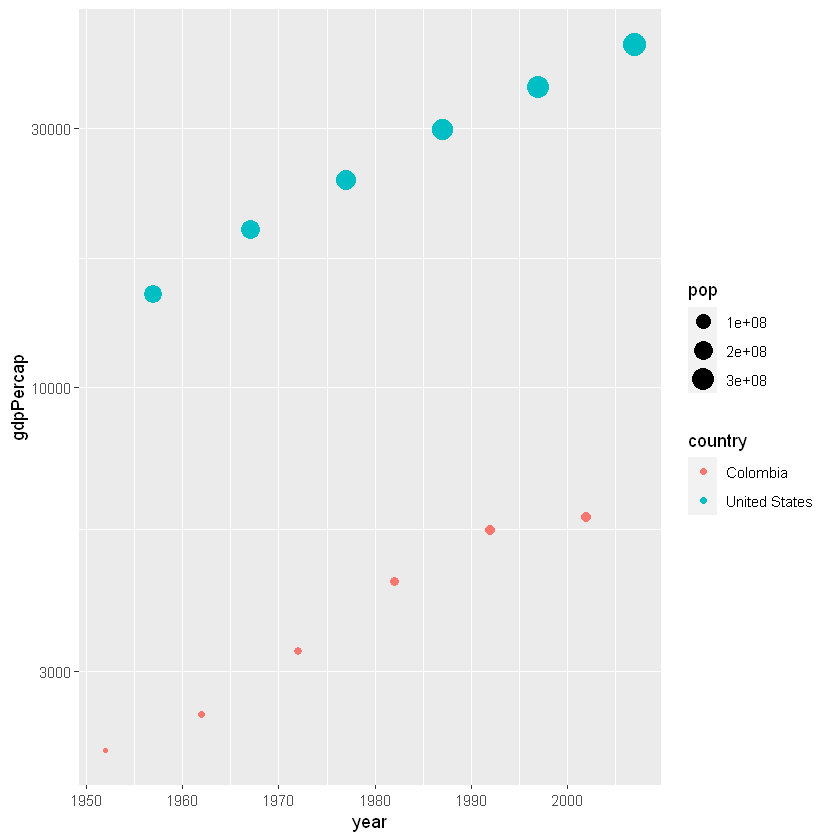

In [87]:
gapminder_col_eu <- gapminder %>% filter(country == c("Colombia","United States"))
ggplot(gapminder_col_eu, aes(x = year, y = gdpPercap, color = country, size = pop)) + geom_point() + scale_y_log10() 
     # + facet_wrap(~continent) # desagregate plots by each continent